In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [48]:
# 1.4
trials = 10**6
line = np.ones(100)
for i in range(trials):
    i,j = random.randint(0,100,2)
    A , B = line[i],line[j]
    sum = A+B
    A_frac = random.randint(0,sum+1)
    line[i] = A_frac
    line[j] = sum-A_frac
    if sum-A_frac < 0:
        print("error")
        break

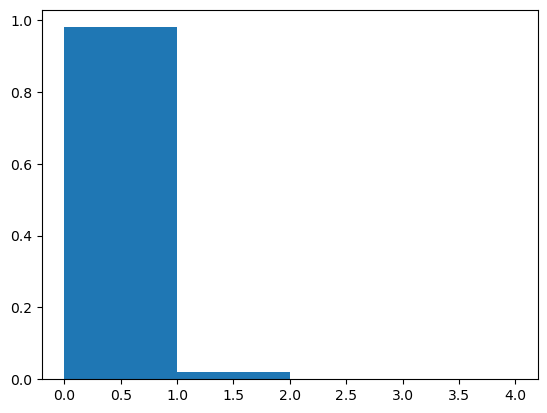

In [49]:
plt.hist(line,density=True,bins=np.arange(0,5))
# x = np.linspace(0,5)
# plt.plot(x,1/2**x*0.4)
plt.show()

In [40]:
# 1.3
N = 10**4
trials = 10**5
Pop = np.zeros(N)
mean = []
mean_dif = []
for i in range(trials):
    Pop_i = np.copy(Pop)
    select = random.choice([True,False],N)
    Pop[select]+=1
    Pop[~select]=0
    mean_dif.append(np.mean(np.sqrt((Pop_i-Pop)**2)))
    mean.append(np.mean(Pop))

14.0


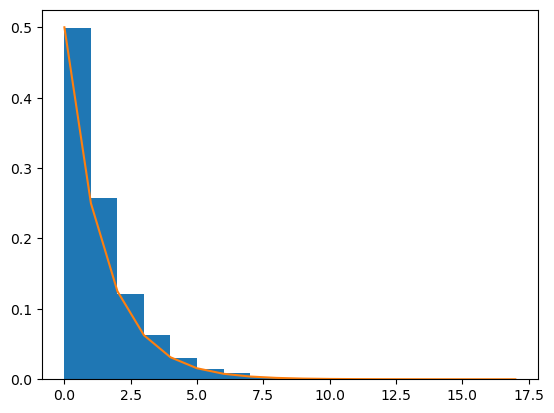

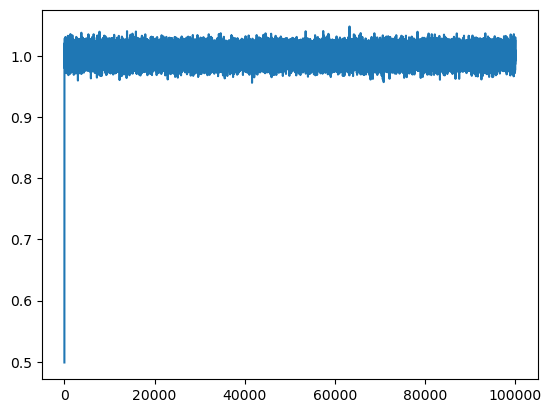

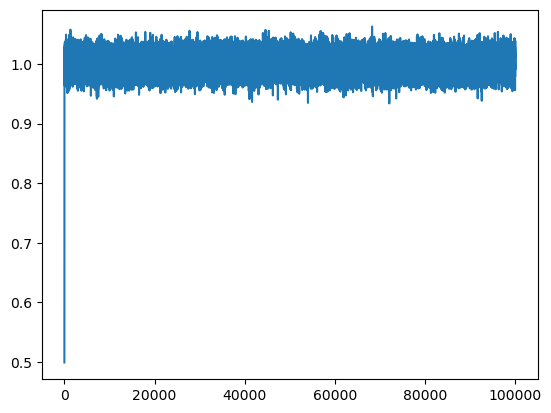

0.9805


In [42]:
print(max(Pop))
bins=np.arange(0,max(Pop))
plt.hist(Pop,density=True,bins=bins)
plt.plot(np.arange(0,18),1/2**(np.arange(0,18))/2)
plt.show()
plt.plot(np.arange(trials),mean_dif)
#plt.ylim(0,10**-1)
plt.show()
plt.plot(np.arange(trials),mean)
plt.show()
print(np.mean(Pop))

In [2]:
# 1.9
def energy(grid,J):
    up = grid*np.roll(grid,1,0)
    down = grid*np.roll(grid,-1,0)
    left = grid*np.roll(grid,1,1)
    right = grid*np.roll(grid,-1,1)
    E_grid = up+down+left+right
    E = -1/2*J*np.sum(E_grid)
    return E

def delta_site_energy(current_grid, i, j, J):
    N = np.shape(current_grid)[0]
    delta_E = -2*current_grid[i,j]*(current_grid[(i+1)%N,j]+current_grid[(i-1)%N,j]+current_grid[i,(j+1)%N]+current_grid[i,(j-1)%N])
    delta_E *= -J
    return delta_E
    

def spinflip(grid):
    i,j = random.randint(0,np.shape(grid)[0],2)
    flip_grid = np.copy(grid)
    flip_grid[i,j] *= -1
    return [i,j,flip_grid]

def exp_factor(delta_E,T):
    x = np.exp(-delta_E/T)
    return x

def select(delta_E,T):
    a= 0
    if delta_E<0:
        return 1
    else:
        random_number = random.rand()
        exp_number = exp_factor(delta_E,T)
        if random_number < exp_number:
            return 1
        else: 
            return 0



In [ ]:
i,j = 1,3
J=-1
test_grid = np.ones((5,5))
test_grid[i,j]=-1
test_grid[0,3]*=-1
print(energy(test_grid,J))
new_grid = np.copy(test_grid)
new_grid[i,j]*=-1
print(energy(new_grid,J))
print(test_grid,new_grid)


print(delta_site_energy(test_grid,i,j,1))

-38.0
-42.0
[[ 1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]] [[ 1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
-4.0


In [119]:
def one_run(N_site = 20, T=1,n_max=10**4,n_0=0,J=1):
    grid = random.randint(0,2,size=[N_site,N_site])
    grid = 2*grid-1
    current_energy = energy(grid,J)
    E = [current_energy]
    s = [np.sum(grid)]
    for l in range(int(n_max)):
        prev_energy = current_energy
        i,j,new_grid = spinflip(grid)
        delta_E = delta_site_energy(grid,i,j,J)
        selection = select(delta_E,T)
        if selection==1:
            grid=new_grid
            current_energy = prev_energy+delta_E
        else:
            current_energy = prev_energy
        E.append(current_energy)
        s.append(np.sum(grid))
    
    return [E,s,grid]

T=2.3
n_max=0.5*10**6
n_0 = int(n_max/4)
N_site=20
J=1

E,s,final_grid = one_run(N_site=N_site,T=T,J=J,n_max=n_max)
E,s = np.array(E),np.array(s)/(N_site**2)

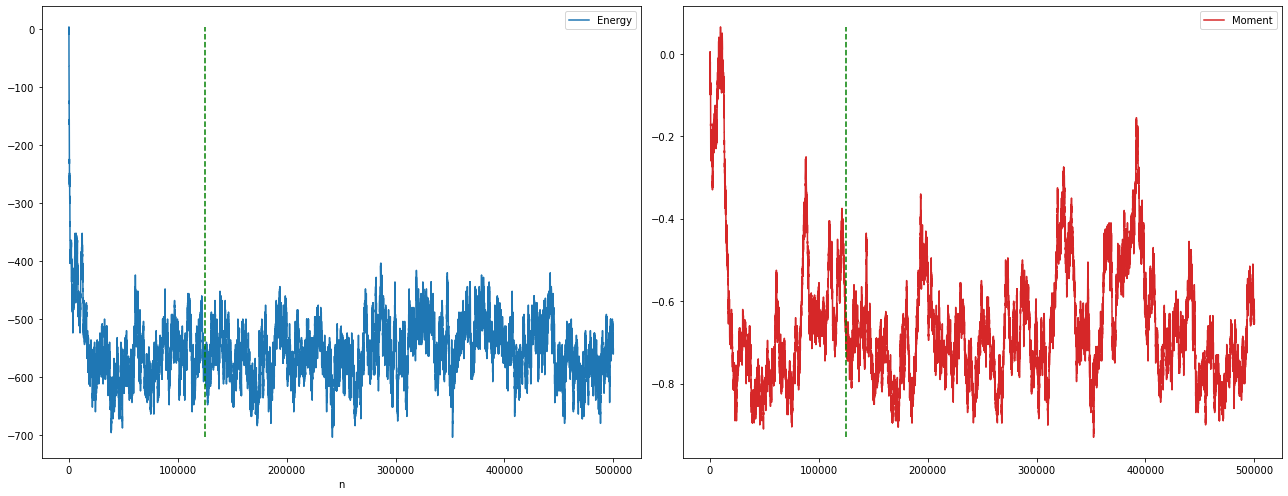

-554.8679390188292
0.6718333151111597


In [120]:
fig,ax = plt.subplots(1,2,figsize=(18,7))
x = np.arange(len(E))
ax[0].plot(x,E,label= "Energy")
ax[1].plot(x,s,label="Moment",color="tab:red")
ax[0].set_xlabel("n")
ax[0].set_xlabel("n")
y_E = np.linspace(min(E),max(E),2)
y_s = np.linspace(min(s),max(s),2)
ax[0].plot([n_0,n_0],y_E,linestyle="dashed",color="green")
ax[1].plot([n_0,n_0],y_s,linestyle="dashed",color="green")



ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()
print(np.mean(E[n_0::]))
print(abs(np.mean(s[n_0::])))

In [57]:
def one_run(N_site = 20, T=1,n_max=10**4,n_0=0,J=1):
    grid = random.randint(0,2,size=[N_site,N_site])
    grid = 2*grid-1
    current_energy = energy(grid,J)
    E = [current_energy]
    s = [np.sum(grid)]
    for l in range(int(n_max)):
        prev_energy = current_energy
        i,j,new_grid = spinflip(grid)
    #    delta_E = delta_site_energy(grid,i,j,J)
        delta_E = energy(new_grid,J)-energy(grid,J)
        selection = select(delta_E,T)
        if selection==1:
            grid=new_grid
            current_energy = prev_energy+delta_E
        else:
            current_energy = prev_energy
        E.append(current_energy)
        s.append(np.sum(grid))
    
    return [E,s,grid]

T=2.2
n_max=4*10**5
n_0 = int(n_max/4)
N_site=20
J=1

E,s = one_run(N_site=N_site,T=T,J=J,n_max=n_max)[:2]